In [11]:
# ALL Genres:

# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import warnings

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# from xgboost import XGBClassifier, XGBRFClassifier
# from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import os

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()

warnings.filterwarnings('ignore')

# List of genres
majors = ['main']
# Load the corresponding datasets for the selected genres
file_names = [f'../Data/clean_df_{genre}.csv' for genre in majors]
data_frames = []

for file_name in file_names:
    if os.path.exists(file_name):
        data_frames.append(pd.read_csv(file_name))
    else:
        print(f"Warning: {file_name} not found.")

if not data_frames:
    print(f"No datasets found for {majors}. Exiting.")
    exit


# Concatenate all genre datasets into a single DataFrame
data = pd.concat(data_frames, ignore_index=True)

# Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
# CGPA, Semester_Credit_Load, Age, Anxiety_Score, Stress_Level, Financial_Stress

# Drop specified columns if they exist
columns_to_drop = ['Course','Gender','Sleep_Quality','Physical_Activity','Diet_Quality','Social_Support','Relationship_Status','Substance_Use','Counseling_Service_Use','Family_History','Chronic_Illness','Extracurricular_Involvement','Residence_Type']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Fit and transform y_train and y_test

y = data['Depression_Score']
X = data.drop(columns=['Depression_Score'])
# X['Course'] = le.fit_transform(X['Course'])

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y[X.index]

# Normalize X
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=X.columns)

# Split the data (20-30% testing split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Accuracy of models

def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy of', title, ':', round(accuracy_score(y_test, preds), 5))

# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=100, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Testing more models

# def model_assess_encoded(model, X_train, y_train, X_test, y_test, title="Default"):
#     # Train model with encoded labels
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     preds_decoded = le.inverse_transform(preds)
#     print(f"Accuracy of {title}", round(accuracy_score(y_test, preds), 5))

# # Cross Gradient Booster
# xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# model_assess_encoded(xgb, X_train, y_train, X_test, y_test, "Extreme Gradient Booster")

# # Cross Gradient Booster (Random Forest)
# xgbrf = XGBRFClassifier(objective= 'multi:softmax')
# model_assess_encoded(xgbrf, X_train, y_train, X_test, y_test, "Extreme Gradient Booster (Random Forest)")


Accuracy of Naive Bayes : 0.18182
Accuracy of Stochastic Gradient Descent : 0.17267
Accuracy of KNN : 0.18468
Accuracy of Decission trees : 0.16581
Accuracy of Random Forest : 0.18811
Accuracy of Support Vector Machine : 0.19668
Accuracy of Logistic Regression : 0.17667
Accuracy of Neural Nets : 0.19611


In [10]:
data.head()

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
0,25,3.56,3,3,2,2,17
1,24,2.44,0,3,0,3,27
2,19,3.74,4,0,3,4,15
3,18,3.40,3,3,4,0,23
4,21,3.35,2,4,3,5,19


In [11]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
le = LabelEncoder()

data = pd.read_csv('../../Data/clean_df_main.csv')

# Load Data
# Assuming 'data' is your dataset
y = data['Depression_Score']
X = data.drop(columns=['Depression_Score'])
X['Course'] = le.fit_transform(X['Course'])
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = y[X.index]

# Normalize Features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Feature Importance Analysis
feature_importance_results = {}

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
feature_importance_results['Random Forest'] = rf_importances

# Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train, y_train)
lr_importances = lr.coef_[0]
feature_importance_results['Logistic Regression'] = lr_importances

# Permutation Importance for SVM/Neural Networks
rf_perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
feature_importance_results['Permutation Importance (RF)'] = rf_perm_importance.importances_mean

# Combine Feature Importances
importance_df = pd.DataFrame({'Feature': X.columns})
for model_name, importances in feature_importance_results.items():
    importance_df[model_name] = importances
print(importance_df.sort_values(by='Random Forest', ascending=False))

# Address Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
print("Best Parameters (Random Forest):", grid_search.best_params_)

# Ensemble Learning
voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(**grid_search.best_params_, random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
], voting='soft')
voting_clf.fit(X_train, y_train)
ensemble_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))
print("Ensemble Accuracy:", ensemble_accuracy)

# Evaluate and Iterate
print("Workflow Complete! Track results and improve further.")


                        Feature  Random Forest  Logistic Regression  \
3                          CGPA       0.126577             0.204673   
0                           Age       0.095695            -0.121981   
17         Semester_Credit_Load       0.094268            -0.190708   
5                 Anxiety_Score       0.071369             0.058907   
15             Financial_Stress       0.068901             0.190518   
4                  Stress_Level       0.064896            -0.032960   
1                        Course       0.063016             0.735039   
18               Residence_Type       0.044518            -0.047058   
16  Extracurricular_Involvement       0.043720            -0.023271   
7             Physical_Activity       0.042752             0.032305   
10          Relationship_Status       0.041104            -0.141535   
8                  Diet_Quality       0.040866            -0.097646   
9                Social_Support       0.039824             0.098067   
6     

**Permuted t-SNE for Feature Influence - Sandeep**

Run t-SNE on the full dataset and create a baseline plot.

Permute (shuffle) each feature individually and re-run t-SNE, comparing the new plot with the baseline.

If permuting a feature disrupts the structure or clustering patterns in t-SNE, that feature may be important for defining the data’s structure. Compile the influential features from this approach and report them as significant.


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from openTSNE import TSNE
from sklearn.metrics.pairwise import euclidean_distances

# List of courses and their dataset file paths
courses = ['business', 'compsci', 'engineering', 'law', 'medical', 'others']
file_paths = [f'../Data/clean_df_{course}.csv' for course in courses]

# Create directories for saving plots and CSV
output_dir = "../Output/"
plots_dir = os.path.join(output_dir, "plots")
csv_dir = os.path.join(output_dir, "data")

os.makedirs(plots_dir, exist_ok=True)
os.makedirs(csv_dir, exist_ok=True)

# Function to load and preprocess the dataset
def preprocess_data(file_path, target_col, features):
    data = pd.read_csv(file_path)
    X = data[features]
    y = data[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

# Function to run TSNE and return results
def run_tsne(data):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, metric="euclidean")
    tsne_results = tsne.fit(data)
    return tsne_results

# Function to plot TSNE results
def plot_tsne(tsne_results, y, title, course, feature=None):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y, cmap="viridis", s=10, alpha=0.7)
    plt.colorbar(label="Depression_Score")
    plt.title(title)
    
    # Save plot as PNG
    plot_filename = f"{course}_{feature if feature else 'baseline'}.png"
    plt.savefig(os.path.join(plots_dir, plot_filename))
    plt.close()

# Feature permutation t-SNE analysis
def permute_feature_and_assess(X, y, features, course):
    baseline_tsne = run_tsne(X)
    plot_tsne(baseline_tsne, y, f"Baseline t-SNE for {course}", course)

    baseline_distances = euclidean_distances(baseline_tsne)
    important_features = []
    
    for feature in features:
        # Permute the feature
        X_permuted = X.copy()
        X_permuted[:, features.index(feature)] = np.random.permutation(X_permuted[:, features.index(feature)])
        
        # Compute t-SNE for permuted data
        permuted_tsne = run_tsne(X_permuted)
        
        # Plot and save permuted feature t-SNE
        plot_tsne(permuted_tsne, y, f"t-SNE after permuting {feature} for {course}", course, feature)
        
        permuted_distances = euclidean_distances(permuted_tsne)
        
        # Calculate similarity score (lower score = more disruption)
        similarity_score = np.mean(np.abs(baseline_distances - permuted_distances))
        
        print(f"Feature: {feature}, Similarity Score: {similarity_score}")
        if similarity_score > 0.1:  # Threshold to determine feature importance (adjustable)
            important_features.append(feature)
    
    return important_features

# Columns in the dataset
features = [
    "Age", "Gender", "CGPA", "Stress_Level", "Anxiety_Score", "Sleep_Quality", 
    "Physical_Activity", "Diet_Quality", "Social_Support", "Relationship_Status", 
    "Substance_Use", "Counseling_Service_Use", "Family_History", "Chronic_Illness", 
    "Financial_Stress", "Extracurricular_Involvement", "Semester_Credit_Load", "Residence_Type"
]
target_col = 'Depression_Score'

# Dictionary to store important features for each course
course_important_features = {}

# Process each course
for course, file_path in zip(courses, file_paths):
    print(f"Processing Course: {course}")
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}. Skipping...")
        continue
    
    # Preprocess data
    X, y = preprocess_data(file_path, target_col, features)
    
    # Run feature permutation analysis
    important_features = permute_feature_and_assess(X, y, features, course)
    course_important_features[course] = important_features
    print(f"Important features for {course}: {important_features}")

# Save the important features data to a CSV file
important_features_df = pd.DataFrame(course_important_features).T
important_features_df.columns = [f"Important_Features_{course}" for course in courses]
important_features_df.to_csv(os.path.join(csv_dir, "important_features.csv"))

# Output summary of important features for all courses
print("\nSummary of important features for all courses:")
print(important_features_df)


Processing Course: business
Feature: Age, Similarity Score: 9.25458384781558
Feature: Gender, Similarity Score: 9.120181977379707
Feature: CGPA, Similarity Score: 8.313250950680771
Feature: Stress_Level, Similarity Score: 8.890500011252907
Feature: Anxiety_Score, Similarity Score: 9.118460998879373
Feature: Sleep_Quality, Similarity Score: 8.886865259450891
Feature: Physical_Activity, Similarity Score: 9.02887041150499
Feature: Diet_Quality, Similarity Score: 9.524121152640964
Feature: Social_Support, Similarity Score: 8.021417475776385
Feature: Relationship_Status, Similarity Score: 8.955750922789857
Feature: Substance_Use, Similarity Score: 9.529161262887252
Feature: Counseling_Service_Use, Similarity Score: 9.57174681422628
Feature: Family_History, Similarity Score: 10.920136059245117
Feature: Chronic_Illness, Similarity Score: 12.36255474082217
Feature: Financial_Stress, Similarity Score: 8.50165192986926
Feature: Extracurricular_Involvement, Similarity Score: 9.28013782329254
Feat

ValueError: Length mismatch: Expected axis has 18 elements, new values have 6 elements

In [17]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

def get_best_rf_params(X_train, X_test, y_train, y_test, verbose=False):
    best_accuracy_rf = 0
    n_for_best_accuracy_rf = 0
    max_feat_for_best_accuracy_rf = 0

    for n in range(10, 100, 5):
        for max_feat in [1, 'log2', 'sqrt']:
            # Create a Random Forest model
            random_forest = RandomForestClassifier(max_features=max_feat, n_estimators=n, random_state=42)
            random_forest.fit(X_train, y_train)

            # Predict and evaluate
            y_pred_rf = random_forest.predict(X_test)
            accuracy_rf = accuracy_score(y_test, y_pred_rf)
            if verbose:
                print(f'Random Forest [n_estimators={n}, max_features={max_feat}] Accuracy: {accuracy_rf:.4f}')

            if accuracy_rf > best_accuracy_rf and accuracy_rf < 1.0:
                best_accuracy_rf = accuracy_rf
                n_for_best_accuracy_rf = n
                max_feat_for_best_accuracy_rf = max_feat
            
    return n_for_best_accuracy_rf, max_feat_for_best_accuracy_rf

def get_importance(filepath, importance_threshold=0.08, depression_threshold=3, scaler=MinMaxScaler(), test_split=0.30, verbose=False, courseIncluded=True):
    # Dataset
    df = pd.read_csv(filepath)
    if(courseIncluded):
        df.drop(['Course'], axis=1, inplace=True)
    df['Depression_Score'] = df['Depression_Score'].apply(lambda x: 1 if x>depression_threshold else 0)
    if verbose:
        print("="*25, "Dataset", "="*25)
        print(df.head())
        print('\n\n', "="*25, "Decision Tree", "="*25)

    X = df.drop(['Depression_Score'], axis=1)
    X_scaled = scaler.fit_transform(X)
    X = pd.DataFrame(X_scaled, columns=X.columns)
    y = df['Depression_Score']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=42, shuffle=True)

    # Decision Tree
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred)

    dt_feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': tree.feature_importances_})
    dt_feature_importances_df = dt_feature_importances_df.sort_values('Importance', ascending=False)
    if verbose:
        print("Accuracy:", accuracy_dt, '\n')
        print("Feature Importance:")
        print(dt_feature_importances_df)

        print('\n\n', "="*25, "Random Forest", "="*25)

    # Random Forest
    n, max_feat = get_best_rf_params(X_train, X_test, y_train, y_test, verbose)
    random_forest = RandomForestClassifier(max_features=max_feat, n_estimators=n, random_state=42)
    random_forest.fit(X_train, y_train)

    y_pred_rf = random_forest.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)

    rf_feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': random_forest.feature_importances_})
    rf_feature_importances_df = rf_feature_importances_df.sort_values('Importance', ascending=False)

    if verbose:
        print()
        print("Accuracy:", accuracy_rf, '\n')
        print("Feature Importance:")
        print(rf_feature_importances_df)

    features = X.columns
    n_features = len(features)

    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,8))

    ax[0].bar(features, tree.feature_importances_)
    ax[0].plot(features, importance_threshold*np.ones(n_features), 'r--')
    ax[0].set_xticklabels(features, rotation=45)
    ax[0].set_title("Importance using Decision Tree")

    ax[1].bar(features, random_forest.feature_importances_)
    ax[1].plot(features, importance_threshold*np.ones(n_features), 'r--')
    ax[1].set_xticklabels(features, rotation=45)
    ax[1].set_title("Importance using Random Forest")

    plt.tight_layout()

========================= Dataset =========================
   Age  Gender  CGPA  Stress_Level  Depression_Score  Anxiety_Score  \
0   25       1  3.56             3                 0              2   
1   24       0  2.44             0                 0              0   
2   19       0  3.74             4                 0              3   
3   18       1  3.40             3                 0              4   
4   21       0  3.35             2                 1              3   

   Sleep_Quality  Physical_Activity  Diet_Quality  Social_Support  \
0            1.0                0.5           1.0             0.5   
1            0.5                0.0           0.5             0.0   
2            1.0                0.0           0.5             0.5   
3            1.0                0.0           0.5             1.0   
4            1.0                0.5           1.0             1.0   

   Relationship_Status  Substance_Use  Counseling_Service_Use  Family_History  \
0                

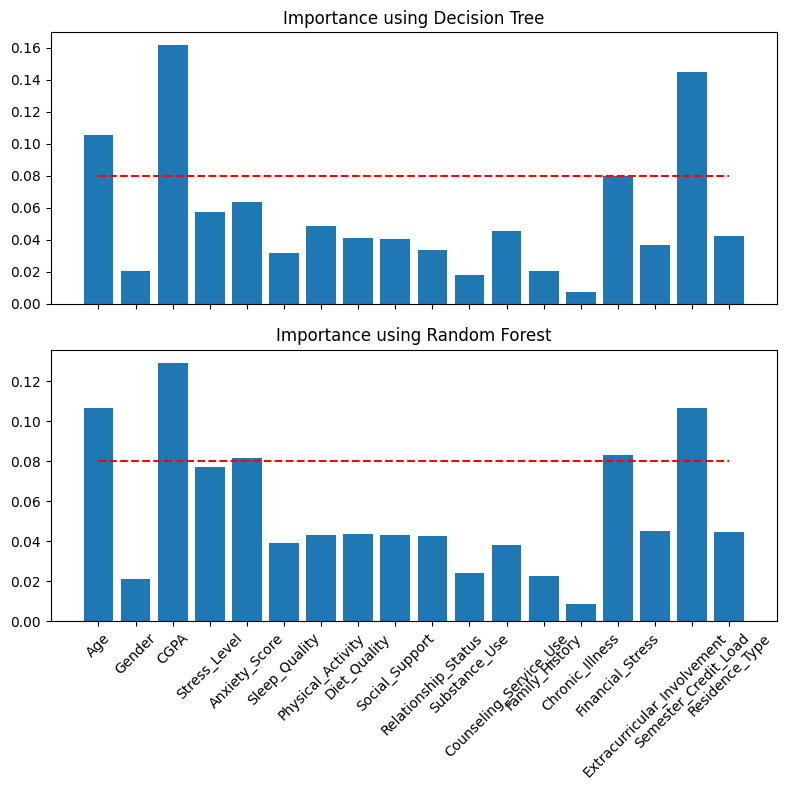

In [13]:
get_importance("../Data/clean_df_main.csv", verbose=True)

In [20]:
data = pd.read_csv('../Data/clean_df_main.csv')

columns_to_drop = ['Course','Gender','Sleep_Quality','Physical_Activity','Diet_Quality','Social_Support','Relationship_Status','Substance_Use','Counseling_Service_Use','Family_History','Chronic_Illness','Extracurricular_Involvement','Residence_Type']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

data.to_csv('../Data/clean_df_main_topSixCols.csv', index=False)


In [ ]:
# ALL Genres:

# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import warnings

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import os

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()

warnings.filterwarnings('ignore')

depression_threshold = 3

# Load the dataset
file_name = '../Data/clean_df_main_topSixCols.csv'

# Concatenate all genre datasets into a single DataFrame
data = pd.read_csv(file_name)

# Fit and transform y_train and y_test

data['Depression_Score'] = data['Depression_Score'].apply(lambda x: 1 if x>depression_threshold else 0)
y = data['Depression_Score']

X = data.drop(columns=['Depression_Score'])
# X['Course'] = le.fit_transform(X['Course'])

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y[X.index]

# Normalize X
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=X.columns)

# Split the data (20-30% testing split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Accuracy of models

def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy of', title, ':', round(accuracy_score(y_test, preds), 5))

# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=55, max_features=1, random_state=42)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Testing more models

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Extreme Gradient Booster")

# Cross Gradient Booster (Random Forest)
num_classes = len(np.unique(y_train))

xgbrf = XGBRFClassifier(objective= 'multi:softmax', num_class=num_classes)
model_assess(xgbrf, "Extreme Gradient Booster (Random Forest)")


Accuracy of Naive Bayes : 0.75929
Accuracy of Stochastic Gradient Descent : 0.75929
Accuracy of KNN : 0.75586
Accuracy of Decission trees : 0.61635
Accuracy of Random Forest : 0.74157
Accuracy of Support Vector Machine : 0.75929
Accuracy of Logistic Regression : 0.75929
Accuracy of Neural Nets : 0.75415
Accuracy of Extreme Gradient Booster : 0.71584
Accuracy of Extreme Gradient Booster (Random Forest) : 0.757


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
depression_threshold = 3
file_name = '../Data/clean_df_main_topSixCols.csv'
data = pd.read_csv(file_name)
data['Depression_Score'] = data['Depression_Score'].apply(lambda x: 1 if x > depression_threshold else 0)
y = data['Depression_Score']
X = data.drop(columns=['Depression_Score'])
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = y[X.index]

# Normalize features
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model evaluation function
def model_assess(model, title="Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f'Accuracy of {title}: {round(accuracy_score(y_test, preds), 5)}')

# Model definitions
models = {
    "Naive Bayes": GaussianNB(),
    "Stochastic Gradient Descent": SGDClassifier(max_iter=5000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=19),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=55, max_features=1, random_state=42),
    "Support Vector Machine": SVC(decision_function_shape="ovo"),
    "Logistic Regression": LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial'),
    "Neural Nets": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
    "XGBoost": XGBClassifier(n_estimators=10000, learning_rate=0.03),
    "XGBRFClassifier": XGBRFClassifier(objective='multi:softmax', num_class=len(np.unique(y_train))),
    "Bagging Classifier": BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Extra Trees Classifier": ExtraTreesClassifier(n_estimators=1000, random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Voting Classifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True))
    ], voting='soft')
}

# Evaluate models
for title, model in models.items():
    model_assess(model, title)

# # Keras Neural Network
# model = Sequential([
#     Dense(128, input_dim=X_train.shape[1], activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# print(f'Accuracy of Keras Neural Network: {round(accuracy, 5)}')


Accuracy of Naive Bayes: 0.75929
Accuracy of Stochastic Gradient Descent: 0.75929
Accuracy of KNN: 0.75586
Accuracy of Decision Trees: 0.61407
Accuracy of Random Forest: 0.74157
Accuracy of Support Vector Machine: 0.75929
Accuracy of Logistic Regression: 0.75929
Accuracy of Neural Nets: 0.75415
Accuracy of XGBoost: 0.68897
Accuracy of XGBRFClassifier: 0.757
Accuracy of Bagging Classifier: 0.73471
Accuracy of Extra Trees Classifier: 0.73299
Accuracy of Linear Discriminant Analysis: 0.75929
Accuracy of Quadratic Discriminant Analysis: 0.75929
Accuracy of AdaBoost: 0.75929
Accuracy of Voting Classifier: 0.75929
